In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)
traindata=datagen.flow_from_directory('/content/drive/MyDrive/flower_photos',target_size=(128, 128),batch_size=32,class_mode='categorical',subset='training')
testdata= datagen.flow_from_directory('/content/drive/MyDrive/flower_photos',target_size=(128, 128),batch_size=32,class_mode='categorical',subset='validation')

Found 2939 images belonging to 5 classes.
Found 731 images belonging to 5 classes.


In [ ]:
class_indices = traindata.class_indices
for class_name, index in class_indices.items():
    class_count = len(traindata.labels[traindata.labels == index])
    print(f"Class '{class_name}': {class_count} images")

Class 'daisy': 507 images
Class 'dandelion': 719 images
Class 'roses': 513 images
Class 'sunflowers': 560 images
Class 'tulips': 640 images


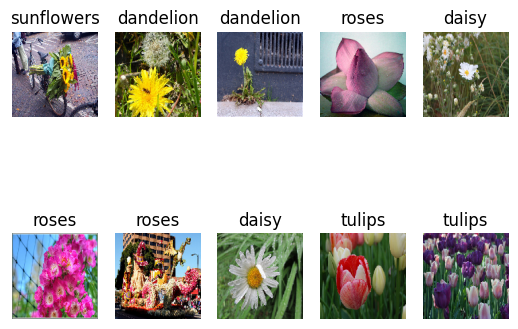

In [ ]:
images, labels = next(traindata)
plt.figure()
for i in range(10):
    plt.subplot(2,5,i+1)  # Adjust subplot grid as needed
    plt.imshow(images[i])
    plt.title(list(class_indices.keys())[list(class_indices.values()).index(np.argmax(labels[i]))])  # Get class name from label
    plt.axis('off')
plt.show()

In [ ]:
class_indices = testdata.class_indices
for class_name, index in class_indices.items():
    class_count = len(testdata.labels[testdata.labels == index])
    print(f"Class '{class_name}': {class_count} images")

Class 'daisy': 126 images
Class 'dandelion': 179 images
Class 'roses': 128 images
Class 'sunflowers': 139 images
Class 'tulips': 159 images


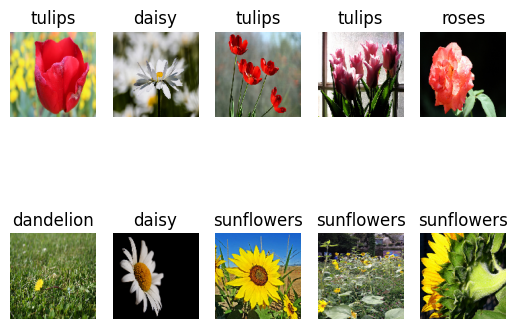

In [ ]:
images, labels = next(testdata)
plt.figure()
for i in range(10):
    plt.subplot(2,5,i+1)  # Adjust subplot grid as needed
    plt.imshow(images[i])
    plt.title(list(class_indices.keys())[list(class_indices.values()).index(np.argmax(labels[i]))])  # Get class name from label
    plt.axis('off')
plt.show()

In [ ]:
VGG=tf.keras.applications.vgg16.VGG16(input_shape=(128,128,3),include_top=False,weights='imagenet')
VGG.trainable=False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model=keras.Sequential([
    VGG,
    keras.layers.Conv2D(64,3,padding='same',activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(256,activation='relu'),
    keras.layers.Dense(5,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 conv2d (Conv2D)             (None, 4, 4, 64)          294976    
                                                                 
 max_pooling2d (MaxPooling2  (None, 2, 2, 64)          0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 256)               65792     
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                        

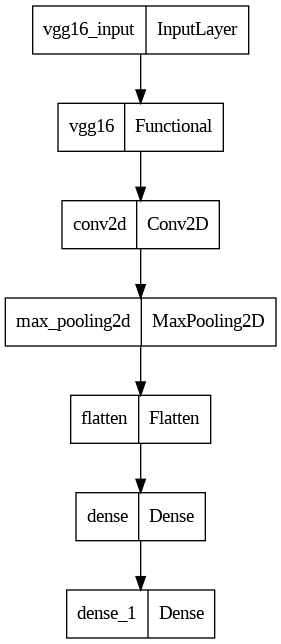

In [ ]:
keras.utils.plot_model(model)

In [ ]:
hist=model.fit_generator(steps_per_epoch=10,generator=traindata,validation_data=testdata,validation_steps=10, epochs=15)
model.save('vgg.h5')

<ipython-input-16-685c2e46a2e5>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(steps_per_epoch=10,generator=traindata,validation_data=testdata,validation_steps=10, epochs=15)


Epoch 1/15
10/10 [==============================] - 164s 16s/step - loss: 0.4539 - accuracy: 0.8250 - val_loss: 0.7059 - val_accuracy: 0.7312
Epoch 2/15
10/10 [==============================] - 213s 23s/step - loss: 0.4888 - accuracy: 0.8125 - val_loss: 0.7769 - val_accuracy: 0.7125
Epoch 3/15
10/10 [==============================] - 144s 15s/step - loss: 0.4443 - accuracy: 0.8375 - val_loss: 0.7098 - val_accuracy: 0.7531
Epoch 4/15
10/10 [==============================] - 156s 16s/step - loss: 0.4881 - accuracy: 0.8406 - val_loss: 0.7449 - val_accuracy: 0.7156
Epoch 5/15
10/10 [==============================] - 152s 16s/step - loss: 0.3639 - accuracy: 0.8687 - val_loss: 0.7580 - val_accuracy: 0.7469
Epoch 6/15
10/10 [==============================] - 153s 16s/step - loss: 0.4503 - accuracy: 0.8500 - val_loss: 0.7870 - val_accuracy: 0.7469
Epoch 7/15
10/10 [==============================] - 144s 15s/step - loss: 0.4230 - accuracy: 0.8406 - val_loss: 0.6881 - val_accuracy: 0.7437
Epoch 

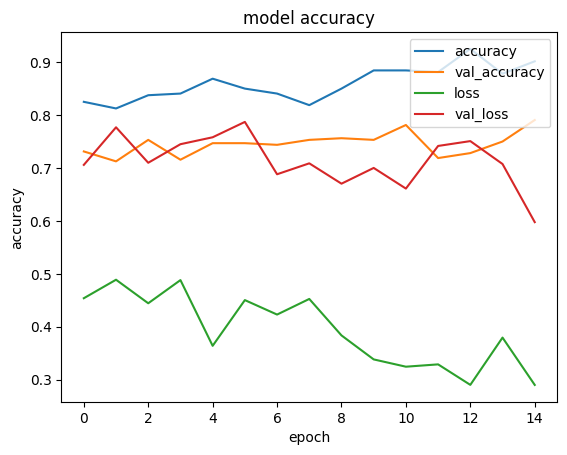

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'], loc='upper right')
plt.show()

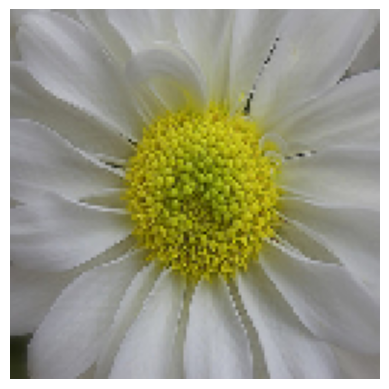

1/1 [==============================] - 0s 362ms/step
Predicted class: daisy


In [ ]:
from keras.models import load_model
from keras.preprocessing import image
model = load_model('vgg.h5')
img_index = 0
img_path = testdata.filepaths[img_index]
img = image.load_img(img_path, target_size=(128, 128))  # Load image and resize
plt.imshow(img)
plt.axis('off')
plt.show()
img_array = image.img_to_array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create batch of size 1
img_array = img_array / 255.0  # Normalize pixel values
predictions = model.predict(img_array)
class_labels = list(testdata.class_indices.keys())
predicted_class = class_labels[np.argmax(predictions)]
print("Predicted class:", predicted_class)

1/1 [==============================] - 0s 341ms/step
Predicted class: tulip


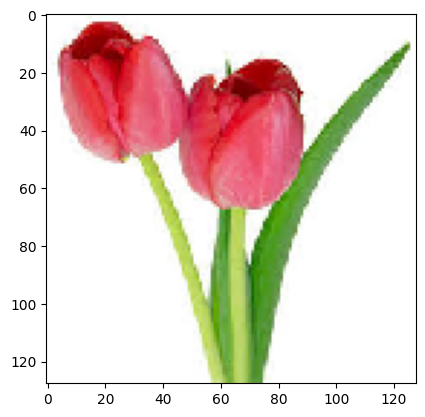

In [ ]:
from keras.models import load_model
model = load_model('vgg.h5')
img_path = '/content/image.jpeg'  # Path to your image
img = image.load_img(img_path, target_size=(128, 128))  # Load image and resize
plt.imshow(img)
img_array = image.img_to_array(img)  # Convert image to numpy array
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create batch of size 1
img_array = img_array / 255.0  # Normalize pixel values
predictions = model.predict(img_array)
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
predicted_class = classes[np.argmax(predictions)]
# Print the predicted class
print("Predicted class:", predicted_class)